In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("/home/gddaslab/mxp140/tls_project/patient_info.json", "r") as file:
    patient_info = json.load(file)

In [3]:
patient_info

{'A': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'],
 'B': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
 'D': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'],
 'E': ['E1', 'E2', 'E3'],
 'F': ['F1', 'F2', 'F3'],
 'G': ['G1', 'G2', 'G3'],
 'H': ['H1', 'H2', 'H3']}

In [4]:
patients = list(patient_info.keys())
patients

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [5]:
where_files = (
    "/home/gddaslab/mxp140/TLS_project/breast_cancer/data/gene_expression_data/"
)
filenames_by_region = [
    filename
    for values in patient_info.values()
    for value in values
    for filename in os.listdir(where_files)
    if filename.startswith(value)
]
# Print the result
print(filenames_by_region)

['A1_gene_expression_data.gz', 'A2_gene_expression_data.gz', 'A3_gene_expression_data.gz', 'A4_gene_expression_data.gz', 'A5_gene_expression_data.gz', 'A6_gene_expression_data.gz', 'B1_gene_expression_data.gz', 'B2_gene_expression_data.gz', 'B3_gene_expression_data.gz', 'B4_gene_expression_data.gz', 'B5_gene_expression_data.gz', 'B6_gene_expression_data.gz', 'C1_gene_expression_data.gz', 'C2_gene_expression_data.gz', 'C3_gene_expression_data.gz', 'C4_gene_expression_data.gz', 'C5_gene_expression_data.gz', 'C6_gene_expression_data.gz', 'D1_gene_expression_data.gz', 'D2_gene_expression_data.gz', 'D3_gene_expression_data.gz', 'D4_gene_expression_data.gz', 'D5_gene_expression_data.gz', 'D6_gene_expression_data.gz', 'E1_gene_expression_data.gz', 'E2_gene_expression_data.gz', 'E3_gene_expression_data.gz', 'F1_gene_expression_data.gz', 'F2_gene_expression_data.gz', 'F3_gene_expression_data.gz', 'G1_gene_expression_data.gz', 'G2_gene_expression_data.gz', 'G3_gene_expression_data.gz', 'H1_gene_

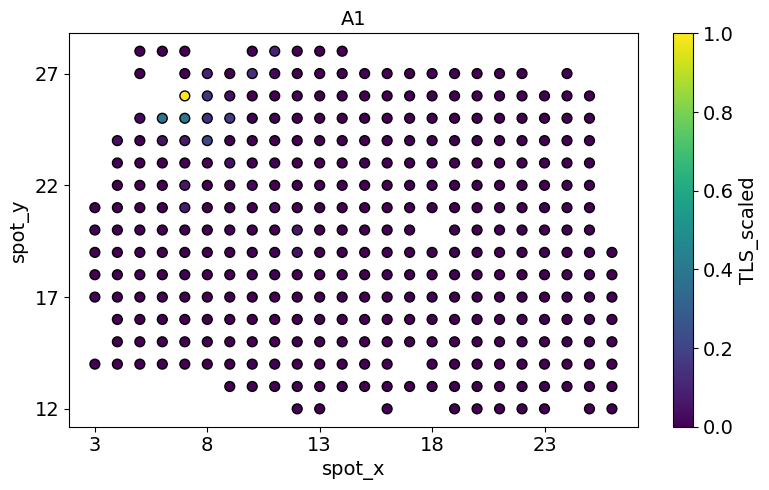

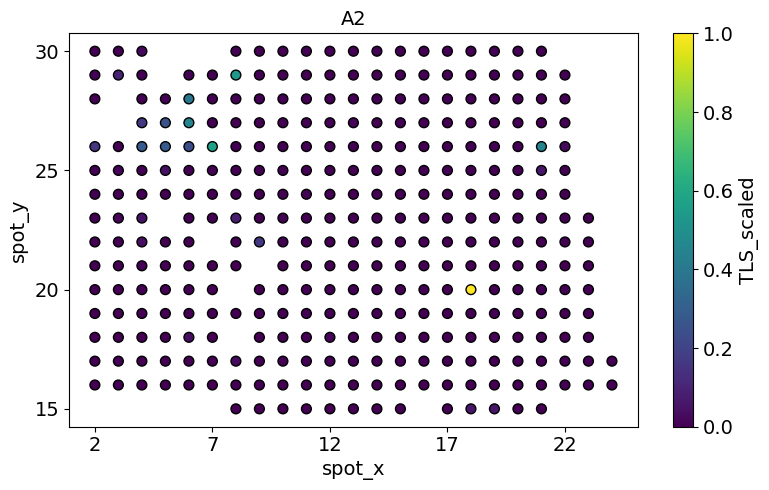

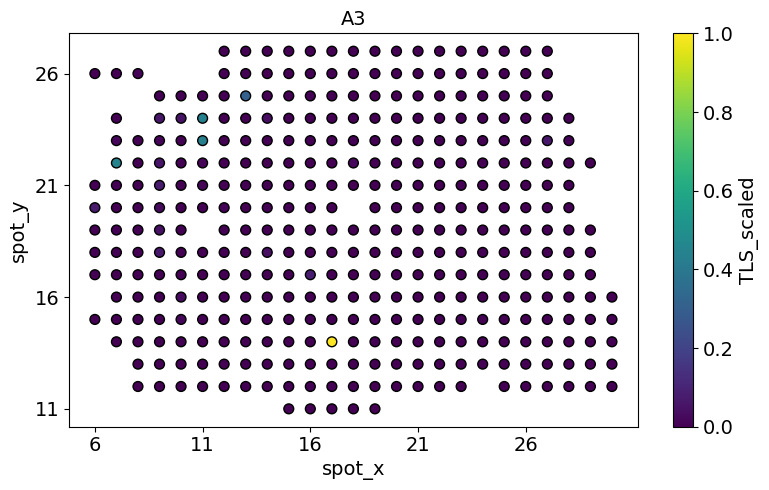

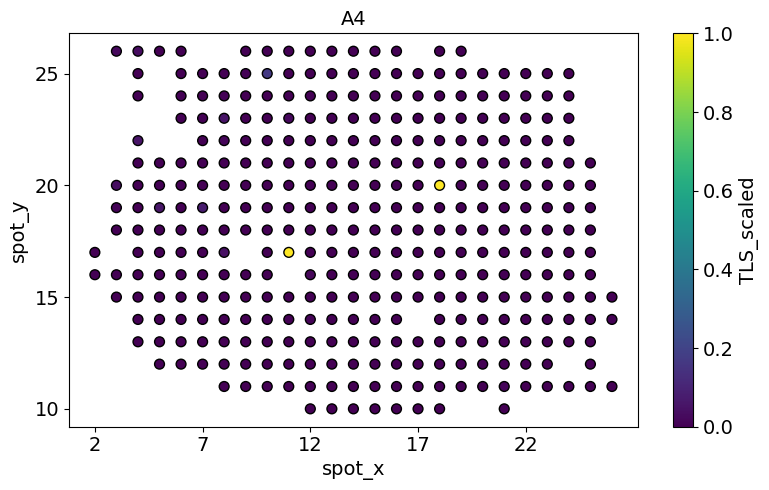

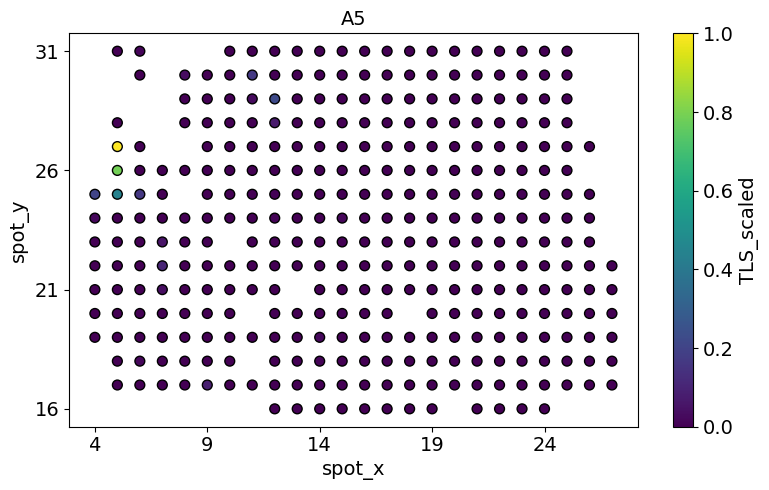

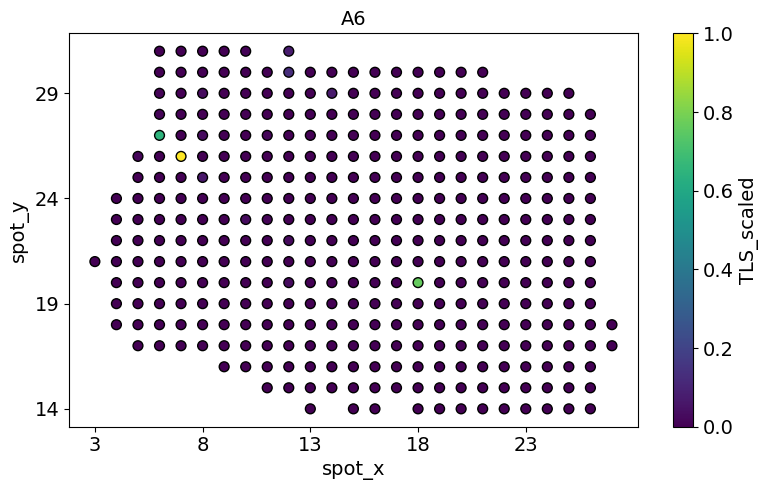

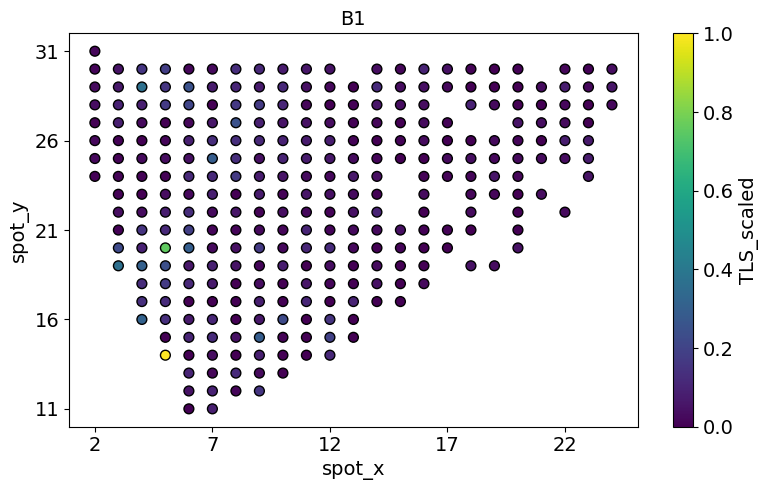

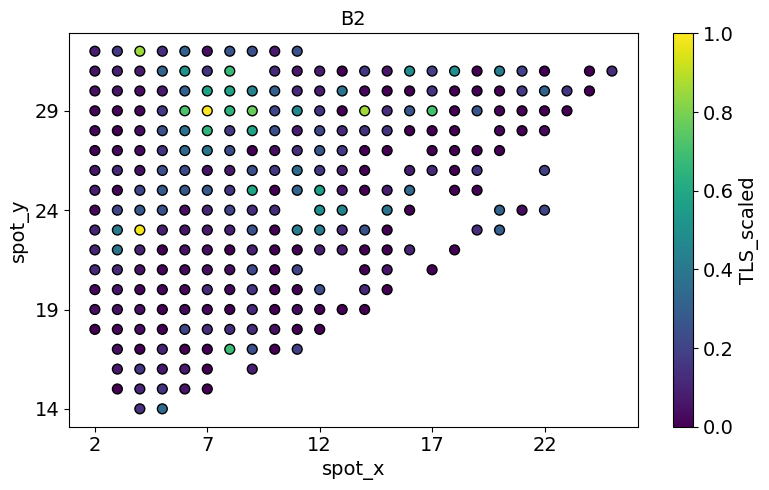

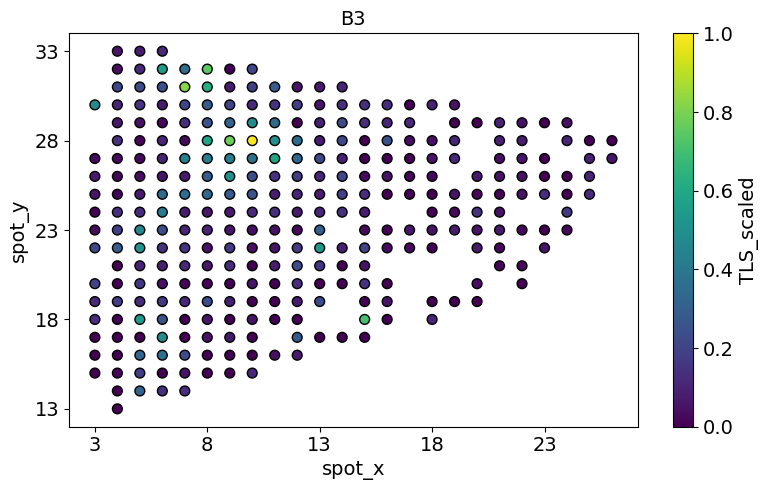

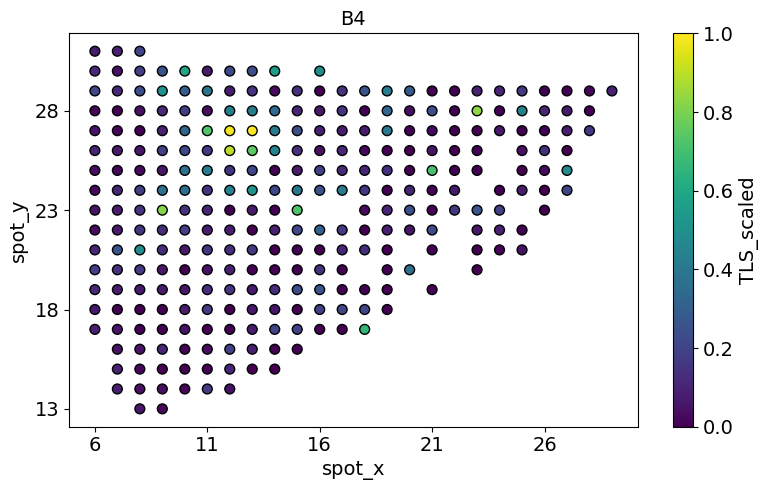

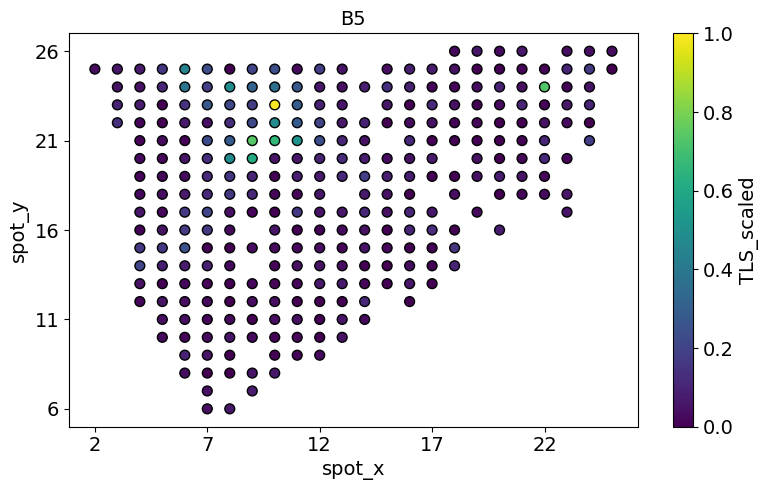

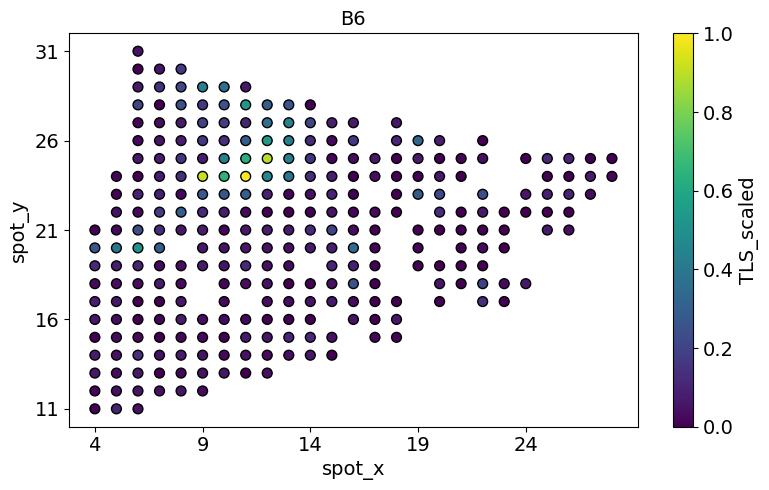

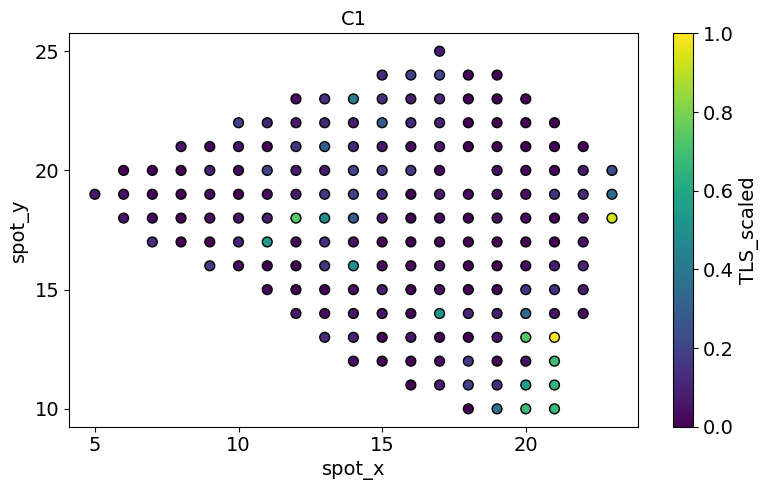

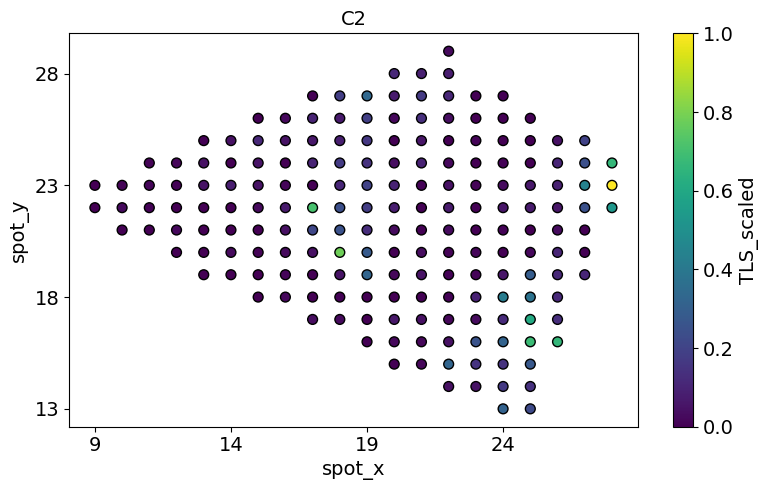

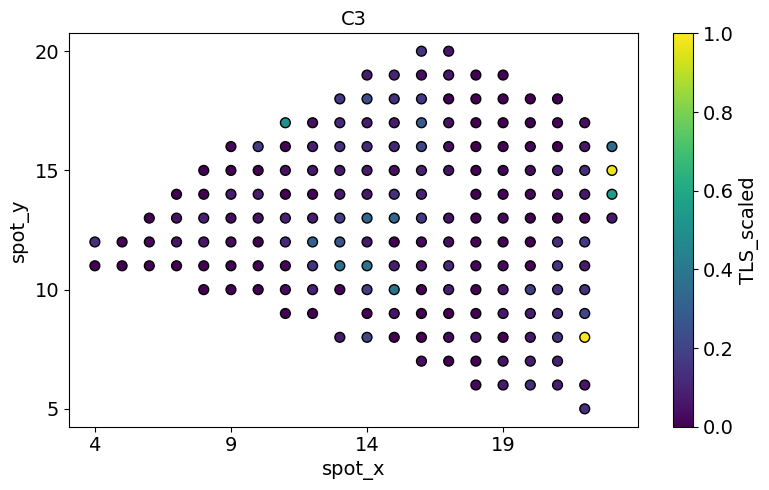

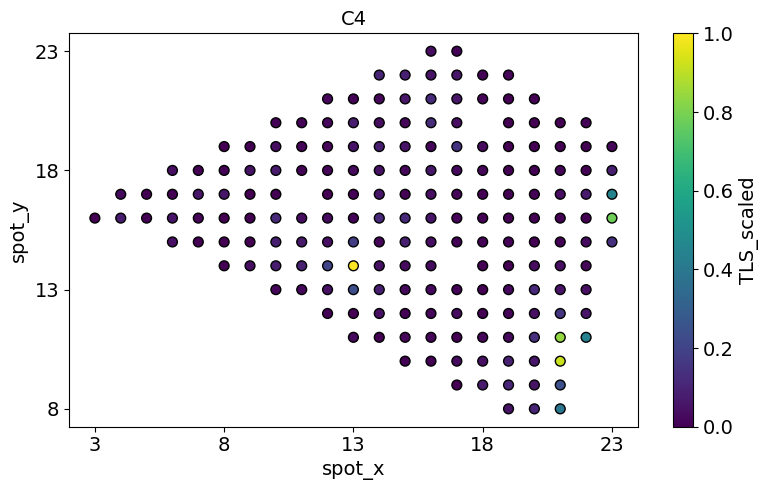

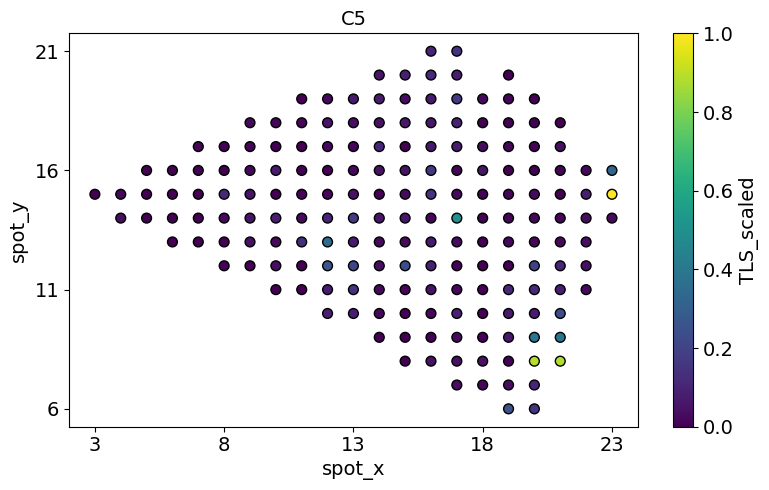

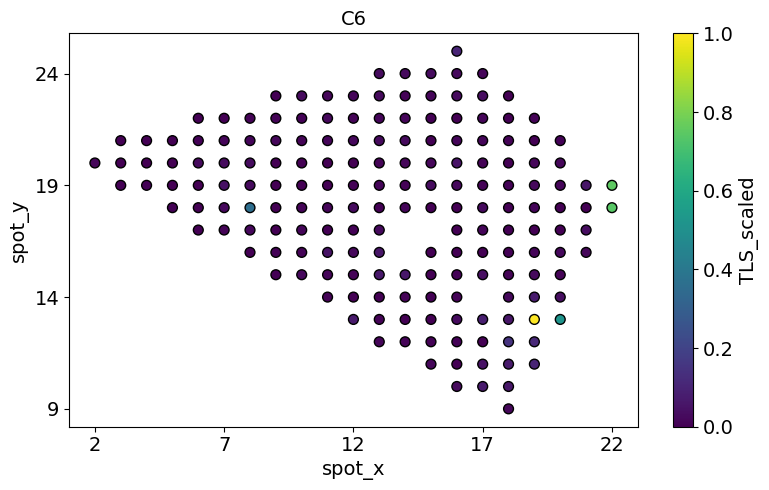

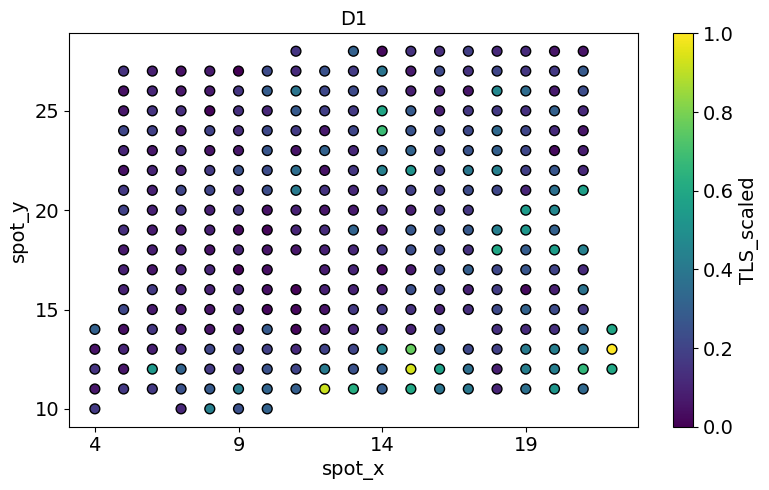

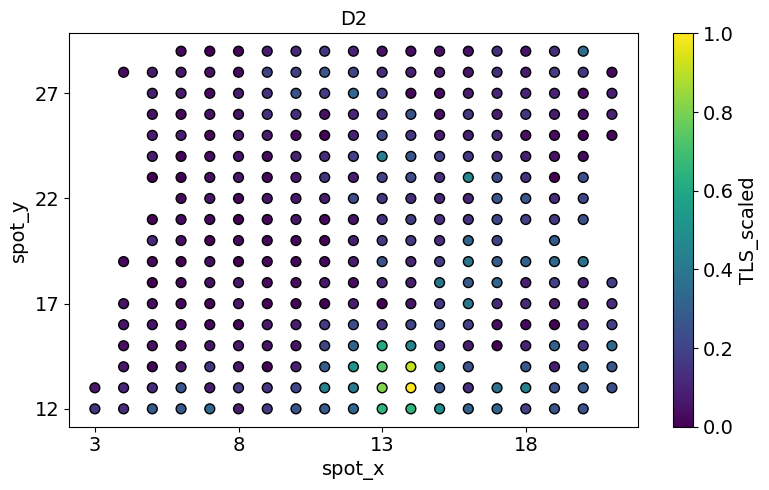

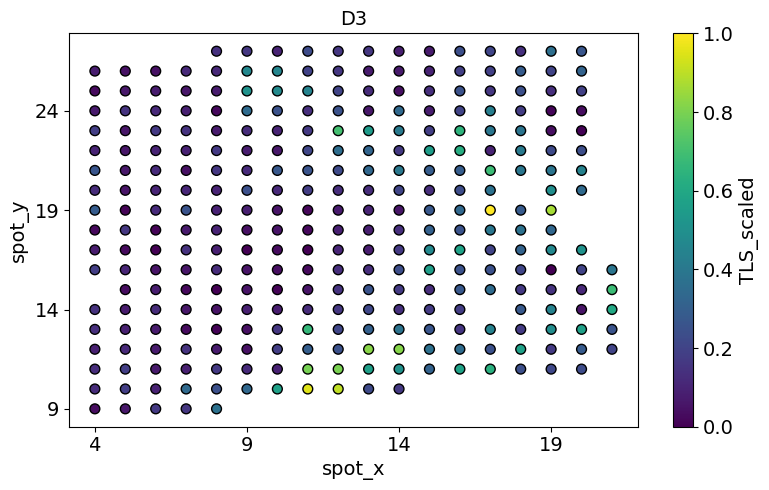

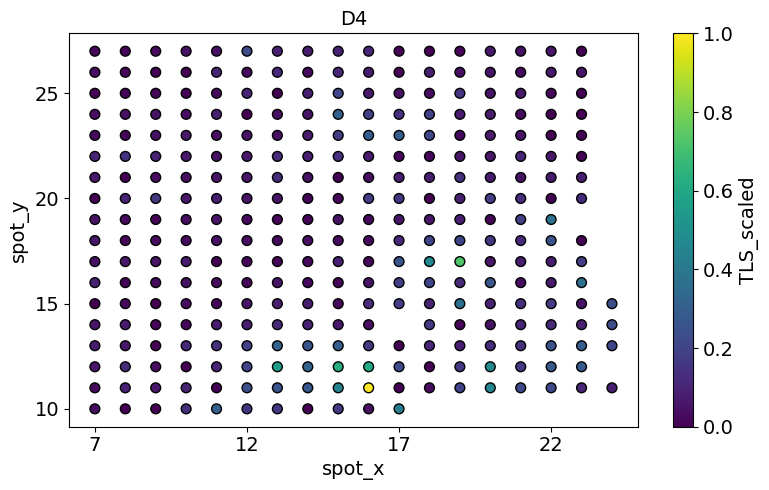

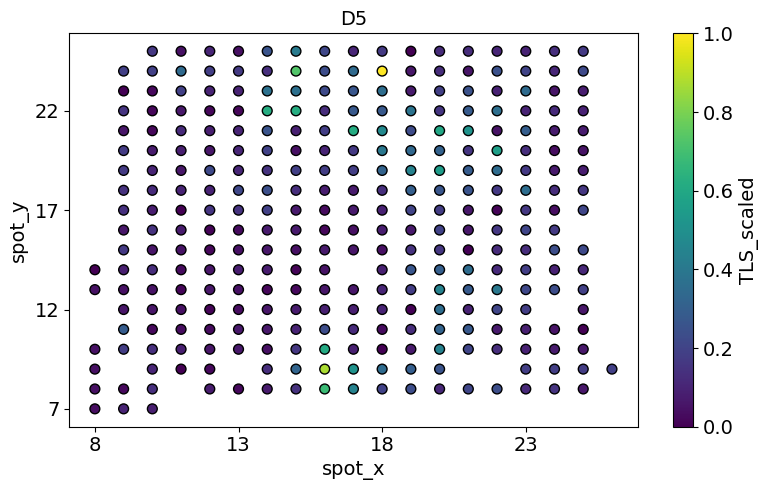

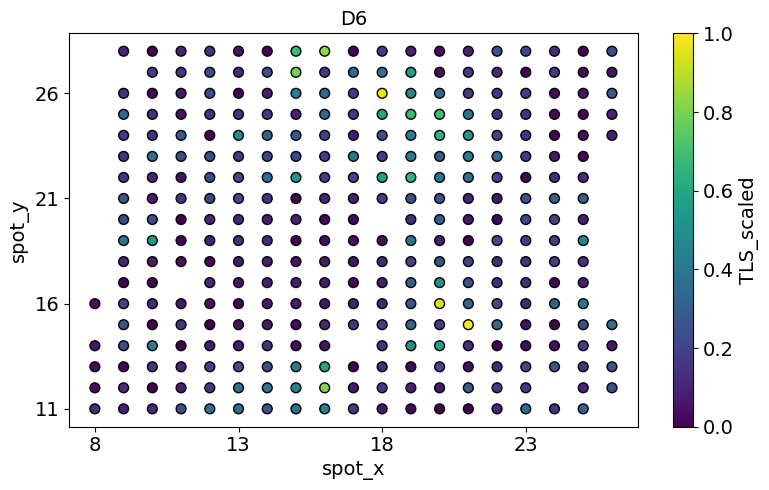

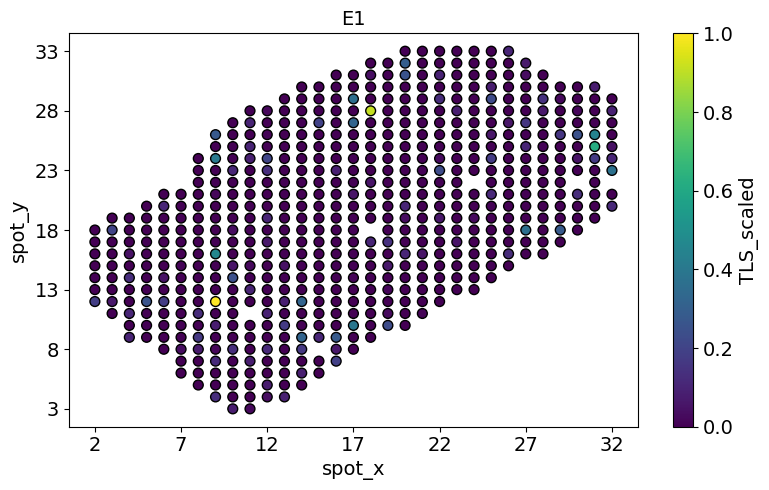

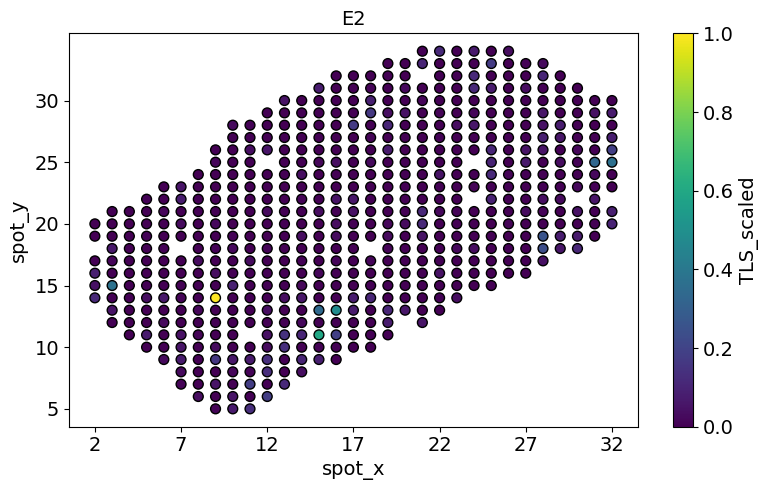

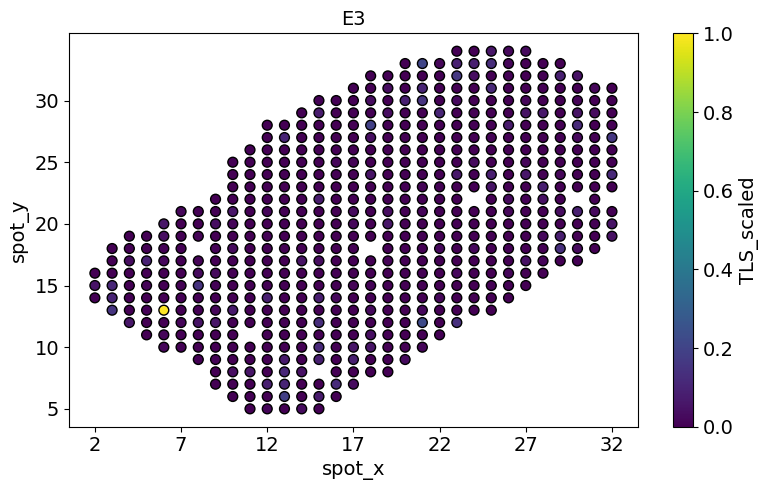

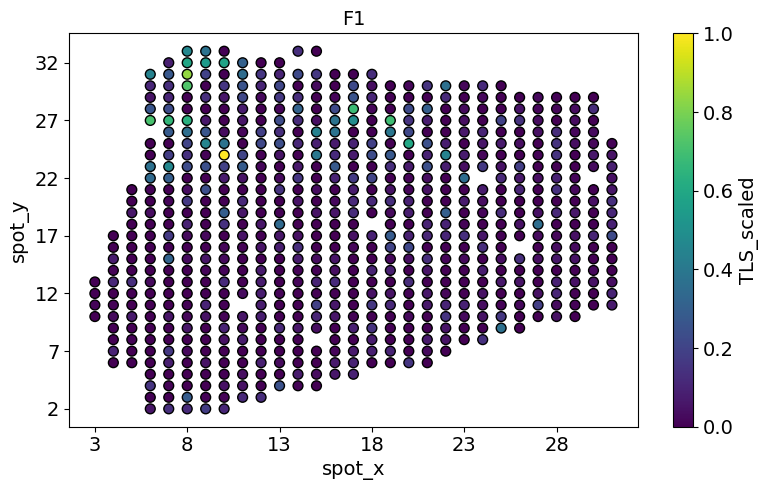

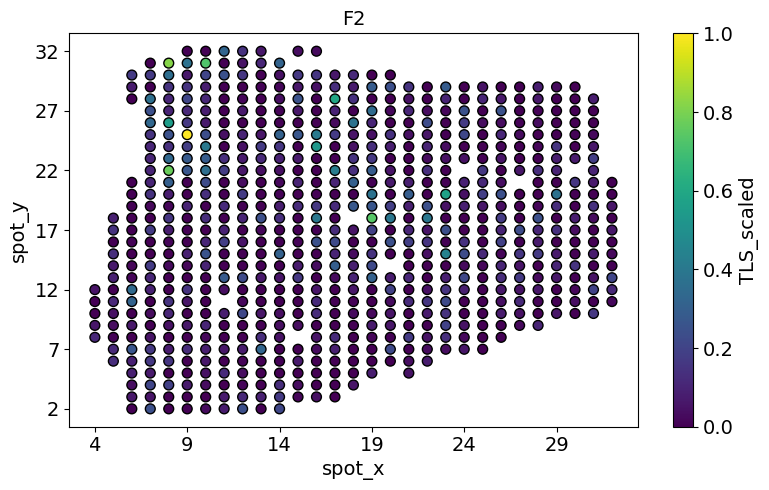

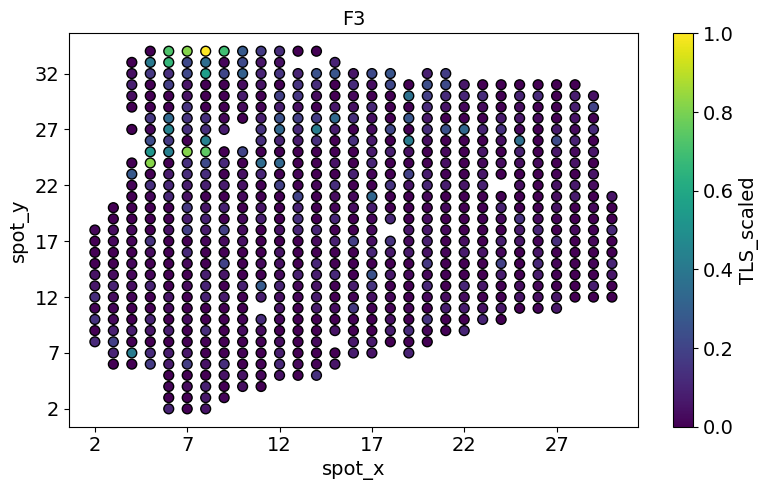

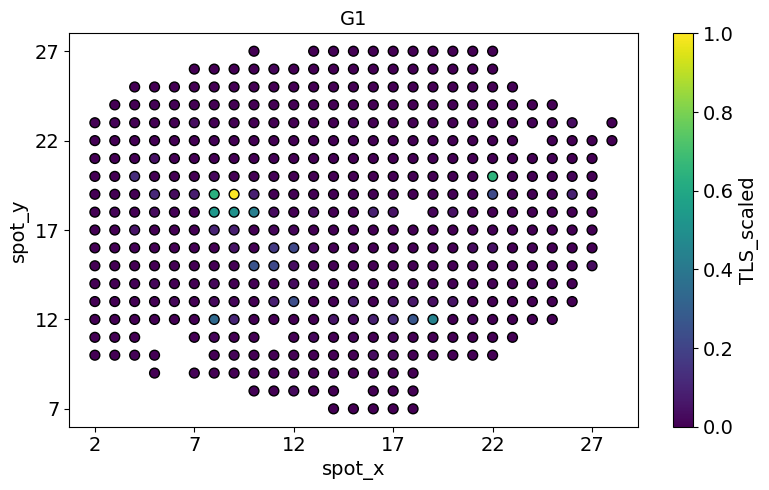

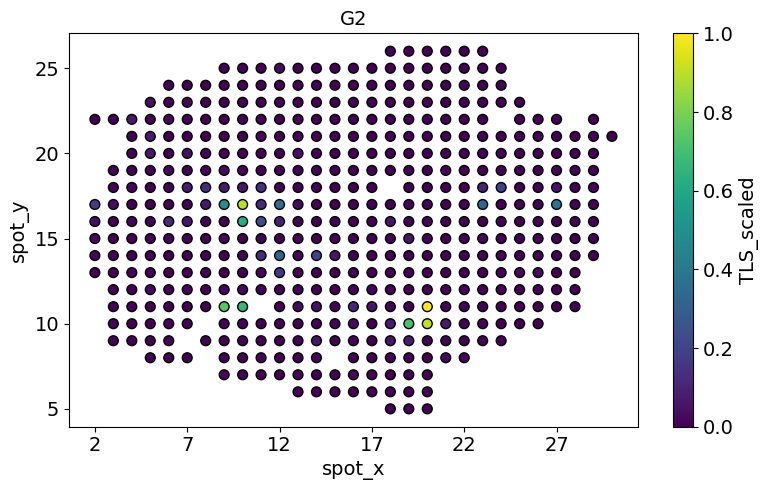

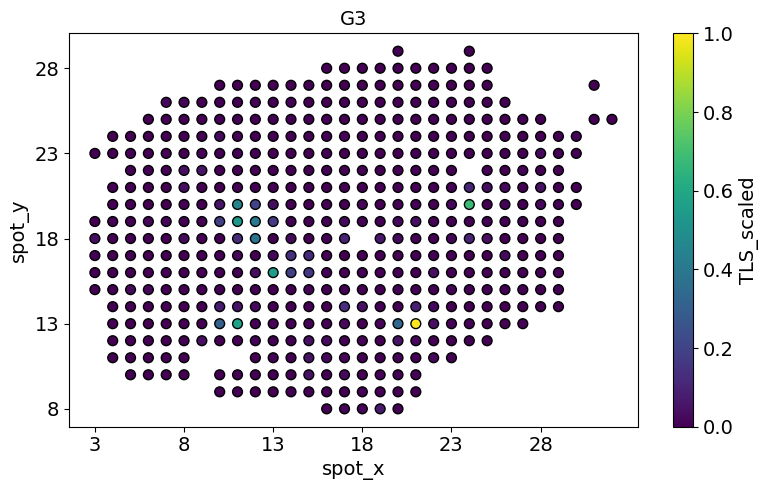

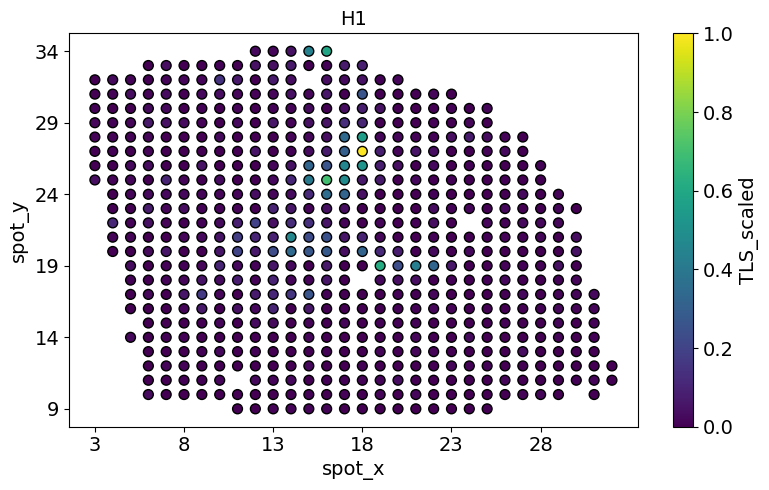

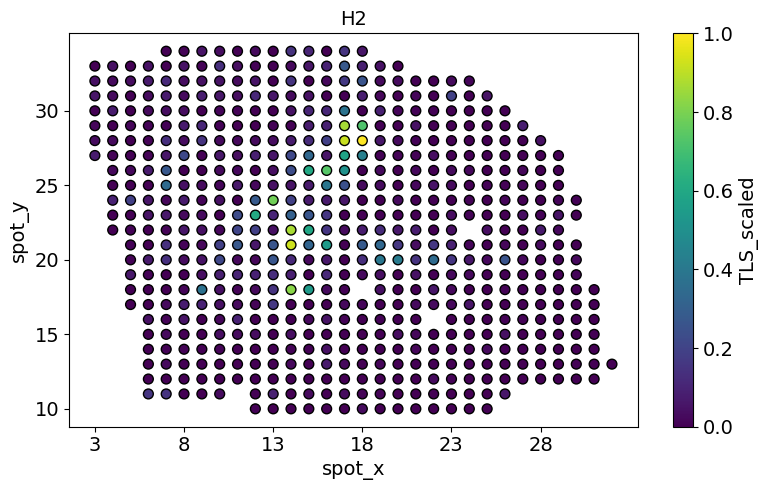

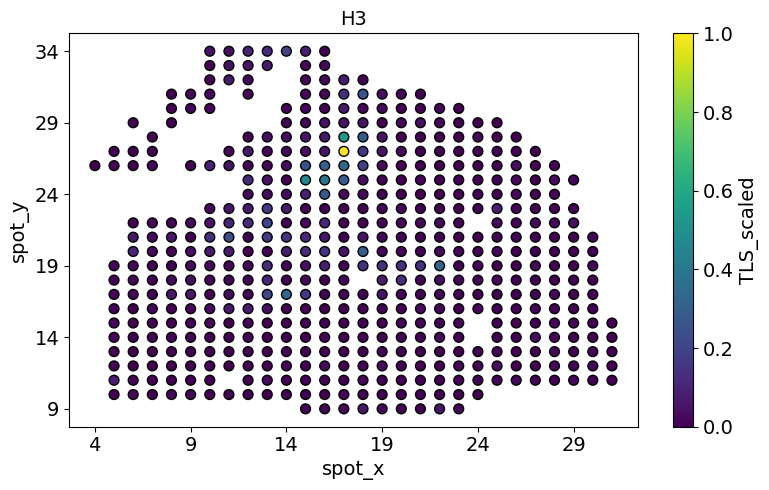

In [8]:
for file in filenames_by_region:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
    df = pd.read_csv(os.path.join(where_files, file), sep="\t", compression="gzip")
    spot_x, spot_y = df["spot_x"], df["spot_y"]
    # Get intensities and normalize them to range [0, 1] for color mapping
    intensities = df["TLS"]
    intensities = (intensities - np.min(intensities)) / (
        np.max(intensities) - np.min(intensities)
    )
    scatter = ax.scatter(
        spot_x, spot_y, c=intensities, s=50, cmap="viridis", edgecolor="black"
    )
    ax.set_xlabel("spot_x", fontsize=14)
    ax.set_ylabel("spot_y", fontsize=14)
    ax.set_xticks(list(set(spot_x))[::5])
    ax.set_yticks(list(set(spot_y))[::5])
    # Increase the size of xtick and ytick labels
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_title(f"{file[:2]}", fontsize=14)

    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label("TLS_scaled", size=14)  # Increase colorbar label size
    cbar.ax.tick_params(labelsize=14)

    fig.tight_layout()
    # fig.savefig(f"{file[:2]}_spots.png", dpi=300)
    plt.show(fig)
    plt.close(fig)